<a href="https://colab.research.google.com/github/Aliasss/kaggle/blob/master/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A1%9C_Gridsearch!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

타이타닉 데이터셋은 너무너무 유명한 데이터셋입니다. 머신러닝을 공부하는 사람이라면 아마 누구나 타이타닉 데이터로 시작했을 것 같아요. 저도 마찬가지이구요.
타이타닉 데이터에 대한 내용은 이미 알고 있으므로 이번 코드에선 다양한 시각화 과정, 모델 성능 향샹은 제외했으며, 그리드 서치를 구현하는 데에 집중했습니다. 

In [41]:
df = pd.read_csv('./train.csv')
print(df.shape)
display(df.head())

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [43]:
display(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [44]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S


In [45]:
display(df['Cabin'].value_counts())
display(df['Embarked'].value_counts())

B96 B98            4
C23 C25 C27        4
G6                 4
D                  3
F2                 3
E101               3
C22 C26            3
F33                3
E33                2
E67                2
C78                2
D33                2
C2                 2
D35                2
F4                 2
C126               2
C93                2
B77                2
B51 B53 B55        2
C124               2
B57 B59 B63 B66    2
C68                2
D20                2
B20                2
D36                2
C65                2
D17                2
B28                2
B18                2
E44                2
                  ..
B42                1
A26                1
C99                1
D48                1
E63                1
B102               1
C82                1
E34                1
A7                 1
A34                1
B19                1
D37                1
D47                1
D19                1
B30                1
C106               1
E38          

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [46]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Cabin'].fillna('n', inplace=True)
df['Embarked'].fillna('S', inplace=True)
display(df.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [50]:
df['Cabin'] = df['Cabin'].str[:1]
df['Cabin'].head()

0    n
1    C
2    n
3    C
4    n
Name: Cabin, dtype: object

In [58]:
df[df['Age'] <= 0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked


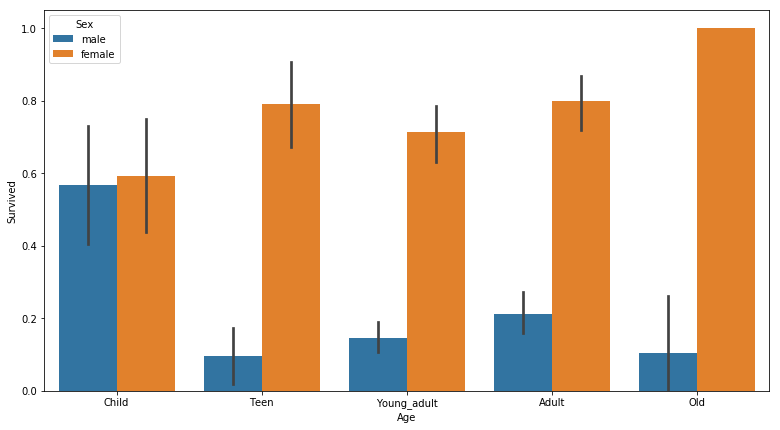

In [62]:
def age(x):
    Age = ''
    if x <= 12: Age='Child'
    elif x <= 19: Age='Teen'
    elif x <= 30: Age='Young_adult'
    elif x <= 60: Age='Adult'
    else: Age='Old'
        
    return Age

plt.figure(figsize=(13, 7))
names = ['Child', 'Teen', 'Young_adult', 'Adult', 'Old']
df['Age'] = df['Age'].apply(lambda x : age(x))
sns.barplot(data=df, x='Age', y='Survived', order=names, hue='Sex') #order : x축 순서

In [63]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,Young_adult,1,0,7.2500,n,S
1,1,1,female,Adult,1,0,71.2833,C,C
2,1,3,female,Young_adult,0,0,7.9250,n,S
3,1,1,female,Adult,1,0,53.1000,C,S
4,0,3,male,Adult,0,0,8.0500,n,S


In [64]:
df.Age.isnull().any()

False

In [0]:
# encoding
from sklearn.preprocessing import LabelEncoder
def encoding(x):
    for i in ['Sex', 'Age', 'Cabin', 'Embarked']:
        x[i] = LabelEncoder().fit_transform(x[i])
        
    return x   

In [66]:
df = encoding(df)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,4,1,0,7.2500,8,2
1,1,1,0,0,1,0,71.2833,2,0
2,1,3,0,4,0,0,7.9250,8,2
3,1,1,0,0,1,0,53.1000,2,2
4,0,3,1,0,0,0,8.0500,8,2


In [74]:
# onehotencoding (pd.get_dummies)

df = pd.get_dummies(df, columns=['Pclass', 'Sex', 'Age', 'Embarked'])
df.head()

,Survived,SibSp,Parch,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Age_0,Age_1,Age_2,Age_3,Age_4,Embarked_0,Embarked_1,Embarked_2
0,0,1,0,7.2500,8,0,0,1,0,1,0,0,0,0,1,0,0,1
1,1,1,0,71.2833,2,1,0,0,1,0,1,0,0,0,0,1,0,0
2,1,0,0,7.9250,8,0,0,1,1,0,0,0,0,0,1,0,0,1
3,1,1,0,53.1000,2,1,0,0,1,0,1,0,0,0,0,0,0,1
4,0,0,0,8.0500,8,0,0,1,0,1,1,0,0,0,0,0,0,1


In [75]:
# 레이블 데이터 분리
y = df['Survived']
X = df.drop('Survived', axis=1)
display(X.shape)
display(y.shape)

(891, 17)

(891,)

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(712, 17)
(712,)
(179, 17)
(179,)


In [106]:
# 교차검증
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(random_state=44)
gb = GradientBoostingClassifier(random_state=44)
rf = RandomForestClassifier(random_state=44)

xgb_cross = cross_val_score(xgb, X, y, cv=5, verbose=1)
gb_cross = cross_val_score(gb, X, y, cv=5, verbose=1)
rf_cross = cross_val_score(rf, X, y, cv=5, verbose=1)

for count, accuracy in enumerate(xgb_cross):
    print('XGB {}번째 accuracy : {:.3f}'.format(count, accuracy))
print('XGB 평균 성능 : {:.3f}'.format(np.mean(xgb_cross)))

print('--------------------------------------')

for count, accuracy in enumerate(gb_cross):
    print('GB {}번째 accuracy : {:.3f}'.format(count, accuracy))
print('GB 평균 성능 : {:.3f}'.format(np.mean(gb_cross)))

print('--------------------------------------')

for count, accuracy in enumerate(rf_cross):
    print('RF {}번째 accuracy : {:.3f}'.format(count, accuracy))
print('RF 평균 성능 : {:.3f}'.format(np.mean(rf_cross)))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


XGB 0번째 accuracy : 0.788
XGB 1번째 accuracy : 0.799
XGB 2번째 accuracy : 0.876
XGB 3번째 accuracy : 0.770
XGB 4번째 accuracy : 0.859
XGB 평균 성능 : 0.818
--------------------------------------
GB 0번째 accuracy : 0.821
GB 1번째 accuracy : 0.804
GB 2번째 accuracy : 0.854
GB 3번째 accuracy : 0.775
GB 4번째 accuracy : 0.864
GB 평균 성능 : 0.824
--------------------------------------
RF 0번째 accuracy : 0.799
RF 1번째 accuracy : 0.788
RF 2번째 accuracy : 0.854
RF 3번째 accuracy : 0.781
RF 4번째 accuracy : 0.859
RF 평균 성능 : 0.816


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.

In [102]:
# 그리드서치

from sklearn.model_selection import GridSearchCV

xgb_param = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}
gb_param = {
#     'n_estimators': [100],
    'min_samples_leaf': [7, 9, 13],
    'max_depth': [4, 5, 6, 7],
    'learning_rate': [0.05, 0.02, 0.01],
}

grid_xgb = GridSearchCV(xgb, param_grid=xgb_param, scoring='accuracy', cv=5)
grid_gb = GridSearchCV(gb, param_grid=gb_param, scoring='accuracy', cv=5)
grid_xgb.fit(X_train, y_train)
grid_gb.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [108]:
print('xgboost best param : ',grid_xgb.best_params_)
print('xgboost best accuracy : ',grid_xgb.best_score_)
print('gradient boosting best param : ',grid_gb.best_params_)
print('gradient boosting best accuracy : ',grid_gb.best_score_)

# best parameter로 학습된 모델로 테스트 데이터 예측 및 평가
xgb_pred = grid_xgb.best_estimator_.predict(X_test)
gb_pred = grid_gb.best_estimator_.predict(X_test)
print('xgboost accuracy(test set) : {:.3f}'.format(accuracy_score(y_test, xgb_pred)))
print('gradient boosting accuracy(test set) : {:.3f}'.format(accuracy_score(y_test, gb_pred)))

# 랜덤포레스트
rf.fit(X_train, y_train)
print('randomforest accuracy(test set) : {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

xgboost best param :  {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 1.0}
xgboost best accuracy :  0.851123595505618
gradient boosting best param :  {'learning_rate': 0.05, 'max_depth': 6, 'min_samples_leaf': 7}
gradient boosting best accuracy :  0.8455056179775281
xgboost accuracy(test set) : 0.743
gradient boosting accuracy(test set) : 0.749
randomforest accuracy(test set) : 0.715


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
